In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
from math import pi

## Label

In [2]:
#Dataset Label Encoder
df_label = pd.read_csv('DataCleanLabel.csv')
df_label.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


In [3]:
#Feature Selection
obese_level = df_label['NObeyesdad']    
df_label = df_label.drop(columns=['NObeyesdad'])
# df_label = df_label.drop(columns=['NObeyesdad', "Height", "Weight", "CALC", "SMOKE","Age","SCC"])

# scaled, k=2, hasilnya 0.53
df_label_cluster = df_label[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC', 'FAF', "FCVC"]]

df_label_cluster ["BMI"]= df_label_cluster['Weight'] / ((df_label_cluster['Height']/100) ** 2)
df_label_cluster = df_label_cluster.drop(columns=['Weight', 'Height'])
# df_label_cluster = df_label[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'CAEC_Frequently', 'NCP', 'SMOKE', 'SCC']]

#Data Standardization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_label_cluster)

/var/folders/wm/v47lypj90l1gqzsfzt6rzn2c0000gn/T/ipykernel_11345/136394436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_cluster ["BMI"]= df_label_cluster['Weight'] / ((df_label_cluster['Height']/100) ** 2)


K=1, Inertia=966.4140349807301
K=2, Inertia=633.321826286203
K=3, Inertia=486.37428498718845
K=4, Inertia=392.1903170151287
K=5, Inertia=329.94008019895995
K=6, Inertia=269.06498865249887
K=7, Inertia=245.21359076460388
K=8, Inertia=224.54930399987418
K=9, Inertia=204.82982256310422


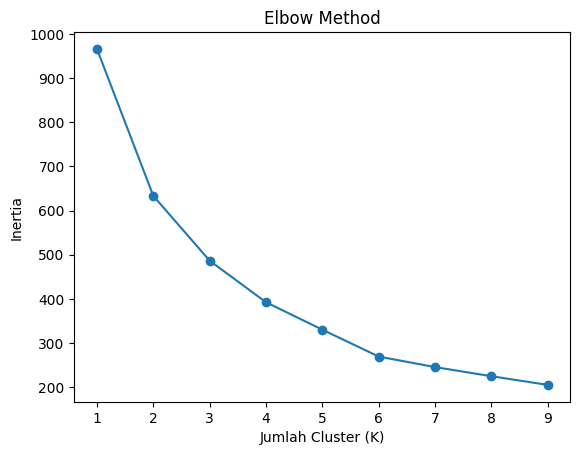

In [18]:
#Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, )
    kmeans.fit(df_scaled)
    print(f'K={k}, Inertia={kmeans.inertia_}')
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [37]:
K = 3# Tentukan jumlah cluster berdasarkan Elbow Method
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10, init='k-means++')
kmeans.fit(df_scaled)
labels = kmeans.labels_
df_label["Cluster"] = labels
# df_label['NObeyesdad'] = obese_level
df_label.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight,2
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight,2
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II,2


In [38]:
#shilhouette score
score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.49268069793718233


## OneHot Only

In [7]:
# DataSet
df_onehot = pd.read_csv('DataCleanOneHot.csv')
# df_onehot = df_onehot.drop(columns=['NObeyesdad', "Height", "Weight"])
# # Feature Selection
# df_onehot_cluster = df_onehot[["FAVC", "FCVC", "NCP" ,"CAEC_Frequently","CAEC_Sometimes","CAEC_no" ,"FAF" ,"TUE" , "MTRANS_Bike" ,"MTRANS_Motorbike",	"MTRANS_Public_Transportation",	"MTRANS_Walking"]]
# df_onehot.head()'
df_onehot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2064 non-null   float64
 1   Height                              2064 non-null   float64
 2   Weight                              2064 non-null   float64
 3   FCVC                                2064 non-null   float64
 4   NCP                                 2064 non-null   float64
 5   CH2O                                2064 non-null   float64
 6   FAF                                 2064 non-null   float64
 7   TUE                                 2064 non-null   float64
 8   NObeyesdad                          2064 non-null   object 
 9   Gender_Male                         2064 non-null   int64  
 10  SMOKE_yes                           2064 non-null   int64  
 11  FAVC_yes                            2064 no

In [8]:
df_onehot_cluster = df_onehot[["Weight", "Height", "FAVC_yes", "FCVC", "NCP" ,"CAEC_Frequently","CAEC_Sometimes","CAEC_no" ,"FAF","family_history_with_overweight_yes", "FCVC"]]
df_onehot_cluster ["BMI"]= df_onehot_cluster['Weight'] / ((df_onehot_cluster['Height']/100) ** 2)
df_onehot_cluster = df_onehot_cluster.drop(columns=['Weight', 'Height'])
df_onehot.head()

#Data Standardization
scaler = MinMaxScaler()
df_scaled_onehot = scaler.fit_transform(df_onehot_cluster)

/var/folders/wm/v47lypj90l1gqzsfzt6rzn2c0000gn/T/ipykernel_11345/1394456728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onehot_cluster ["BMI"]= df_onehot_cluster['Weight'] / ((df_onehot_cluster['Height']/100) ** 2)


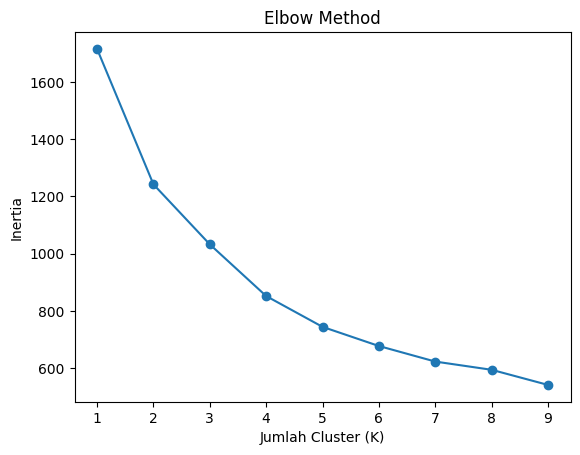

In [9]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_onehot)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [21]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20, algorithm='elkan', init='k-means++')
kmeans.fit(df_scaled_onehot)
labels_one = kmeans.labels_
df_onehot['Cluster'] = labels_one
df_onehot.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_yes,Cluster
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,0,...,0,0,0,1,0,0,1,0,1,2
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,0,...,0,0,1,0,0,0,1,0,1,2
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,1,...,0,1,0,0,0,0,1,0,1,2
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,1,...,0,1,0,0,0,0,0,1,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,1,...,0,0,1,0,0,0,1,0,0,1


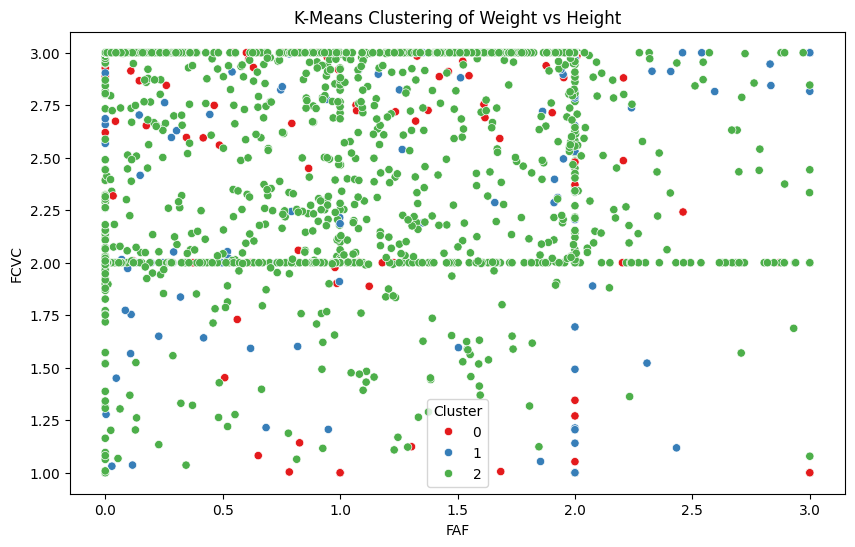

Silhouette Score: 0.4008152067448901


In [22]:
#Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_onehot, x='FAF', y='FCVC', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering of Weight vs Height')
plt.show()
#shilhouette score
score = silhouette_score(df_scaled_onehot, labels_one)
print(f'Silhouette Score: {score}')


## Combine

In [12]:
df_label = pd.read_csv('DataCleanLabel.csv')
df_onehot = pd.read_csv('DataCleanOneHot.csv')
# p = 'Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'CAEC_Frequently',
feature_label = [['Weight', 'Height', 'family_history_with_overweight', 'FAVC', "FAF", "FCVC"]]
feature_onehot = [['CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently']]


# display(df_label.head(5))
# display(df_onehot.head(5))
df_combine_cluster = pd.DataFrame(
   {
    'Weight': df_label['Weight'],
    'Height': df_label['Height'],
    'family_history_with_overweight': df_label['family_history_with_overweight'],
    'FAVC': df_label['FAVC'],
    'FAF': df_label['FAF'],
    'CAEC_Sometimes': df_onehot['CAEC_Sometimes'],
    'CAEC_no': df_onehot['CAEC_no'],
    'CAEC_Frequently': df_onehot['CAEC_Frequently'],
      'FCVC': df_label['FCVC'],
   }
)

df_combine_cluster['BMI']= df_combine_cluster['Weight'] / ((df_combine_cluster['Height']/100) ** 2)
df_combine_cluster = df_combine_cluster.drop(columns=['Weight', 'Height'])


display(df_combine_cluster.head(5))

,family_history_with_overweight,FAVC,FAF,CAEC_Sometimes,CAEC_no,CAEC_Frequently,FCVC,BMI
0,1,0,0.0,1,0,0,2.0,243865.264441
1,1,0,3.0,1,0,0,3.0,242382.271468
2,1,0,2.0,1,0,0,2.0,237654.320988
3,0,0,2.0,1,0,0,3.0,268518.518519
4,0,0,0.0,1,0,0,2.0,283423.810125


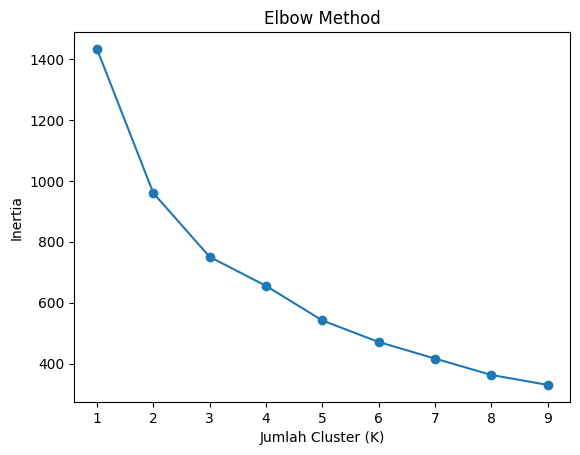

In [13]:
#Data Standardization
scaler = MinMaxScaler()
df_scaled_combine = scaler.fit_transform(df_combine_cluster)
inertia = []
K_range = range(1, 10)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_combine)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [14]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20, algorithm='elkan', init='k-means++')
kmeans.fit(df_scaled_combine)
labels_combine = kmeans.labels_
df_combine_cluster['Cluster'] = labels_combine
df_combine_cluster.head()


,family_history_with_overweight,FAVC,FAF,CAEC_Sometimes,CAEC_no,CAEC_Frequently,FCVC,BMI,Cluster
0,1,0,0.0,1,0,0,2.0,243865.264441,2
1,1,0,3.0,1,0,0,3.0,242382.271468,2
2,1,0,2.0,1,0,0,2.0,237654.320988,2
3,0,0,2.0,1,0,0,3.0,268518.518519,0
4,0,0,0.0,1,0,0,2.0,283423.810125,0


In [15]:
#Silhouette Score
score = silhouette_score(df_scaled_combine, labels_combine)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.472284233456537


In [16]:
# #Visualisasi
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df_combine_cluster, x='FAF', y='FCVC', hue='Cluster', palette='Set1')
# plt.title('K-Means Clustering of Weight vs Height')
# plt.show()